In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
from tqdm import tnrange, tqdm_notebook
import matplotlib.backends.backend_pdf
from IPython.display import clear_output

import scvelo as scv
scv.settings.set_figure_params('scvelo', dpi_save=200, dpi=40, transparent=True)
scv.settings.verbosity = 0
sc.settings.verbosity=0

In [13]:
data_path='/fast/scratch/users/peidlis_c/sodar_patient_organoid_data/'
signatures_path='/fast/work/users/peidlis_c/projects/sodar_patient_organoid_data/signatures/'

In [14]:
donors = ['NCO', 'p009ot', 'p013ot']
letters = ['E', 'W']
# pdf = matplotlib.backends.backend_pdf.PdfPages(
#               './figures/NB_AS_latenttime_heatmaps_filtereddyngenes.pdf')

In [15]:
donor='p009ot'

letter='W'
adata = scv.read(data_path+'NB_AS_'+letter+'/processed/NB_AS_'+letter+'_'+donor+'SLAMvelo.h5')

In [18]:
scv.tl.velocity_confidence(adata, vkey='dyn_velo')

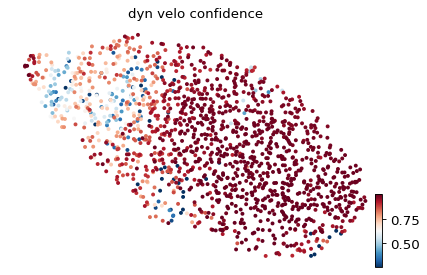

In [19]:
scv.pl.scatter(adata, color='dyn_velo_confidence', perc=[2,98], vkey='dyn_velo')

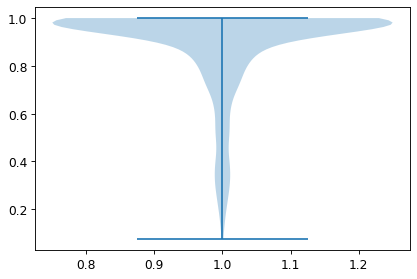

In [20]:
pl.violinplot(adata.obs['dyn_velo_confidence']);

In [77]:
data = []
data_ = []
x=[]
for donor in donors:
    for letter in letters:
        adata = scv.read(data_path+'NB_AS_'+letter+'/processed/NB_AS_'+letter+'_'+donor+'SLAMvelo.h5')
        scv.tl.velocity_confidence(adata, vkey='dyn_velo')
        data.append(adata.obs['dyn_velo_confidence'])
        data_.append(adata.var['fit_likelihood'])
        x.append(donor+' '+letter)

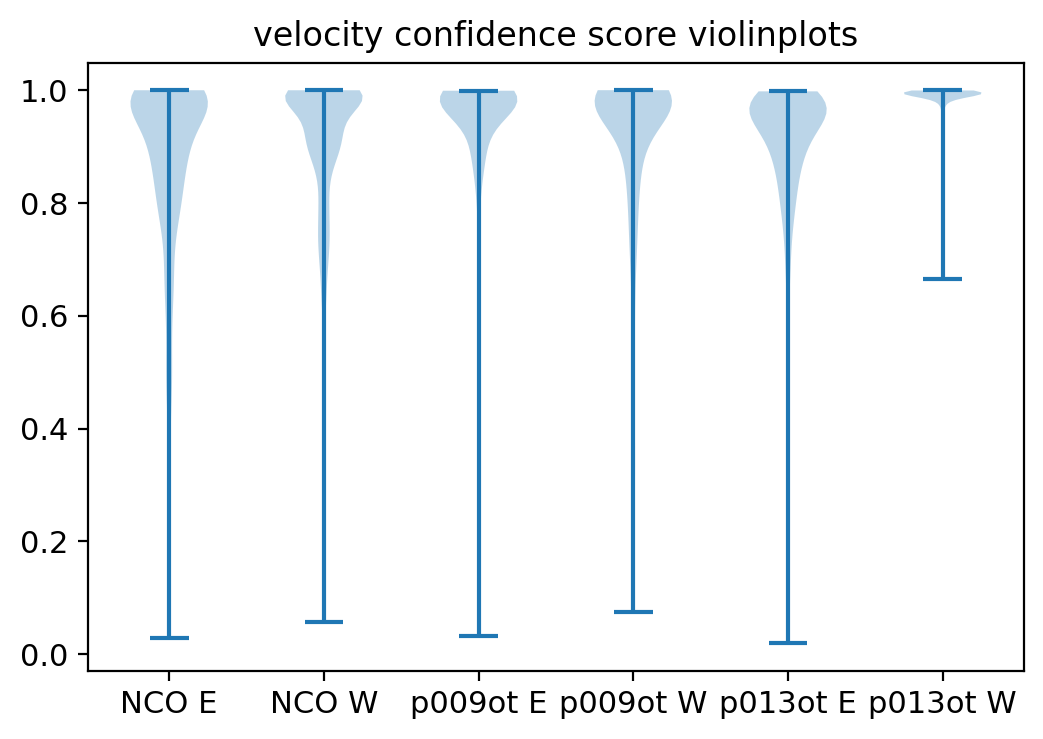

In [117]:
pl.figure(dpi=100)
pl.violinplot(data);
pl.title('velocity confidence score violinplots')
pl.xticks(np.arange(len(x))+1, x);

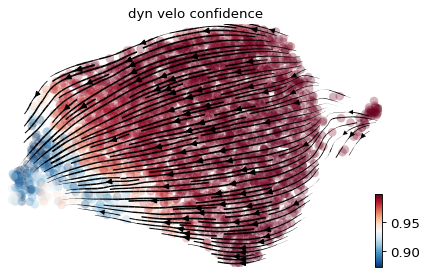

In [79]:
scv.pl.velocity_embedding_stream(adata, color='dyn_velo_confidence', perc=[2,98], vkey='dyn_velo')

In [104]:
d = data_.copy()
dd=[a[a!=0] for a in d]
dd=[a[~pd.isna(a)] for a in dd]

(0.0, 1.0)

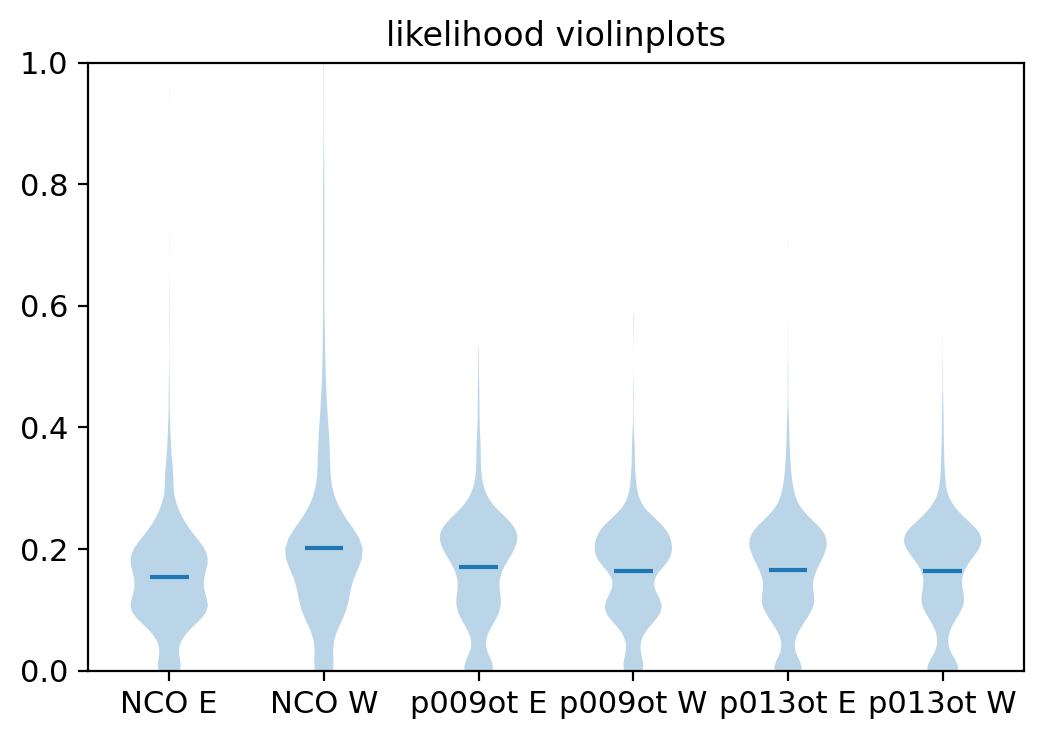

In [115]:
pl.figure(dpi=100)
pl.violinplot(dd, showextrema=False, showmeans=True);
pl.title('likelihood violinplots')
pl.xticks(np.arange(len(x))+1, x)
pl.ylim([0,1])